In [1]:
import intake
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from xmip.preprocessing import combined_preprocessing
from xarrayutils.plotting import shaded_line_plot
from xmip.utils import google_cmip_col

from datatree import DataTree
from xmip.postprocessing import _parse_metric

import cartopy.crs as ccrs

In [2]:
col = intake.open_esm_datastore(
    "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
)  # open an intake catalog containing the Pangeo CMIP cloud data
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [3]:
# from the full `col` object, create a subset using facet search
cat = col.search(
    source_id="CESM2",
    variable_id=[
        "hfls",
        "hfss",
        "rlds",
        "rlus",
        "rsds",
        "rsus",
        "tas",
        "rsdt",
        "rsut",
        "rlut",
    ],
    member_id="r1i1p1f1",
    table_id="Amon",
    grid_label="gn",
    experiment_id=["historical", "hist-nat"],
    require_all_on=[
        "source_id"
    ],  # make sure that we only get models which have all of the above experiments
)

# convert the sub-catalog into a datatree object, by opening each dataset into an xarray.Dataset (without loading the data)
kwargs = dict(
    preprocess=combined_preprocessing,  # apply xMIP fixes to each dataset
    xarray_open_kwargs=dict(
        use_cftime=True
    ),  # ensure all datasets use the same time index
    storage_options={
        "token": "anon"
    },  # anonymous/public authentication to google cloud storage
)

cat.esmcat.aggregation_control.groupby_attrs = ["source_id", "experiment_id"]
dt = cat.to_datatree(**kwargs)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'source_id/experiment_id'


In [4]:
dt

DataTree('None', parent=None)
└── DataTree('CESM2')
    ├── DataTree('historical')
    │       Dimensions:         (member_id: 1, dcpp_init_year: 1, time: 1980, y: 192,
    │                            x: 288, nbnd: 2)
    │       Coordinates:
    │         * y               (y) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    │         * x               (x) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    │         * time            (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    │           lat_bounds      (y, nbnd, x) float64 dask.array<chunksize=(192, 2, 288), meta=np.ndarray>
    │           lon_bounds      (x, nbnd, y) float64 dask.array<chunksize=(288, 2, 192), meta=np.ndarray>
    │           time_bounds     (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    │         * nbnd            (nbnd) int64 0 1
    │           lon             (x, y) float64 360.0 360.0 360.0 360.0 ... 358.8 358.8 358.8
    │           lat             (x, y) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
    │         * member_id       (member_id) object 'r1i1p1f1'
    │         * dcpp_init_year  (dcpp_init_year) float64 nan
    │       Data variables:
    │           hfls            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    │           hfss            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    │           rlds            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    │           rlus            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    │           rlut            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    │           rsds            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    │           rsdt            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    │           rsus            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    │           rsut            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    │           tas             (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    │       Attributes: (12/54)
    │           Conventions:                      CF-1.7 CMIP-6.2
    │           activity_id:                      CMIP
    │           branch_method:                    standard
    │           branch_time_in_child:             674885.0
    │           branch_time_in_parent:            219000.0
    │           case_id:                          15
    │           ...                               ...
    │           intake_esm_attrs:member_id:       r1i1p1f1
    │           intake_esm_attrs:table_id:        Amon
    │           intake_esm_attrs:grid_label:      gn
    │           intake_esm_attrs:version:         20190308
    │           intake_esm_attrs:_data_format_:   zarr
    │           intake_esm_dataset_key:           CESM2/historical
    └── DataTree('hist-nat')
            Dimensions:         (member_id: 1, dcpp_init_year: 1, time: 1980, y: 192,
                                 x: 288, nbnd: 2)
            Coordinates:
              * y               (y) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
              * x               (x) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
              * time            (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
                lat_bounds      (y, nbnd, x) float64 dask.array<chunksize=(192, 2, 288), meta=np.ndarray>
                lon_bounds 

In [5]:
# the historical including anthropogenic forcing
hist_dt = dt["CESM2"]["historical"]
hist_dt

DataTree('historical', parent="CESM2")
    Dimensions:         (member_id: 1, dcpp_init_year: 1, time: 1980, y: 192,
                         x: 288, nbnd: 2)
    Coordinates:
      * y               (y) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
      * x               (x) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
      * time            (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
        lat_bounds      (y, nbnd, x) float64 dask.array<chunksize=(192, 2, 288), meta=np.ndarray>
        lon_bounds      (x, nbnd, y) float64 dask.array<chunksize=(288, 2, 192), meta=np.ndarray>
        time_bounds     (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
      * nbnd            (nbnd) int64 0 1
        lon             (x, y) float64 360.0 360.0 360.0 360.0 ... 358.8 358.8 358.8
        lat             (x, y) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
      * member_id       (member_id) object 'r1i1p1f1'
      * dcpp_init_year  (dcpp_init_year) float64 nan
    Data variables:
        hfls            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
        hfss            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
        rlds            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
        rlus            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
        rlut            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
        rsds            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
        rsdt            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
        rsus            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
        rsut            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
        tas             (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    Attributes: (12/54)
        Conventions:                      CF-1.7 CMIP-6.2
        activity_id:                      CMIP
        branch_method:                    standard
        branch_time_in_child:             674885.0
        branch_time_in_parent:            219000.0
        case_id:                          15
        ...                               ...
        intake_esm_attrs:member_id:       r1i1p1f1
        intake_esm_attrs:table_id:        Amon
        intake_esm_attrs:grid_label:      gn
        intake_esm_attrs:version:         20190308
        intake_esm_attrs:_data_format_:   zarr
        intake_esm_dataset_key:           CESM2/historical

In [6]:
# the historical run without anthropogenic forcing
hist_nat = dt["CESM2"]["hist-nat"]
hist_nat

DataTree('hist-nat', parent="CESM2")
    Dimensions:         (member_id: 1, dcpp_init_year: 1, time: 1980, y: 192,
                         x: 288, nbnd: 2)
    Coordinates:
      * y               (y) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
      * x               (x) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
      * time            (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
        lat_bounds      (y, nbnd, x) float64 dask.array<chunksize=(192, 2, 288), meta=np.ndarray>
        lon_bounds      (x, nbnd, y) float64 dask.array<chunksize=(288, 2, 192), meta=np.ndarray>
        time_bounds     (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
      * nbnd            (nbnd) int64 0 1
        lon             (x, y) float64 360.0 360.0 360.0 360.0 ... 358.8 358.8 358.8
        lat             (x, y) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
      * member_id       (member_id) object 'r1i1p1f1'
      * dcpp_init_year  (dcpp_init_year) float64 nan
    Data variables:
        hfls            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 586, 192, 288), meta=np.ndarray>
        hfss            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 577, 192, 288), meta=np.ndarray>
        rlds            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 699, 192, 288), meta=np.ndarray>
        rlus            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 716, 192, 288), meta=np.ndarray>
        rlut            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 714, 192, 288), meta=np.ndarray>
        rsds            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 672, 192, 288), meta=np.ndarray>
        rsdt            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 981, 192, 288), meta=np.ndarray>
        rsus            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 698, 192, 288), meta=np.ndarray>
        rsut            (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 663, 192, 288), meta=np.ndarray>
        tas             (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 813, 192, 288), meta=np.ndarray>
    Attributes: (12/54)
        Conventions:                      CF-1.7 CMIP-6.2
        activity_id:                      DAMIP
        branch_method:                    standard
        branch_time_in_child:             674885.0
        branch_time_in_parent:            306600.0
        case_id:                          1479
        ...                               ...
        intake_esm_attrs:member_id:       r1i1p1f1
        intake_esm_attrs:table_id:        Amon
        intake_esm_attrs:grid_label:      gn
        intake_esm_attrs:version:         20190730
        intake_esm_attrs:_data_format_:   zarr
        intake_esm_dataset_key:           CESM2/hist-nat

In [7]:
(
    hist_dt.hfls.long_name,
    hist_dt.hfss.long_name,
    hist_dt.rlds.long_name,
    hist_dt.rlus.long_name,
    hist_dt.rsds.long_name,
    hist_dt.rsus.long_name,
)

('Surface Upward Latent Heat Flux',
 'Surface Upward Sensible Heat Flux',
 'Surface Downwelling Longwave Radiation',
 'Surface Upwelling Longwave Radiation',
 'Surface Downwelling Shortwave Radiation',
 'Surface Upwelling Shortwave Radiation')

In [8]:
# predefine heat fluxes for each experiement, take annual means

# model output variables (.squeeze() removes singleton dimensions)
hist_am_latent_heat_flux = hist_dt.ds.hfls.mean(dim="time").squeeze()
hist_am_sensible_heat_flux = hist_dt.ds.hfss.mean(dim="time").squeeze()
hist_am_downwelling_longwave_flux = hist_dt.ds.rlds.mean(dim="time").squeeze()
hist_am_upwelling_longwave_flux = hist_dt.ds.rlus.mean(dim="time").squeeze()
hist_am_downwelling_shortwave_flux = hist_dt.ds.rsds.mean(dim="time").squeeze()
hist_am_upwelling_shortwave_flux = hist_dt.ds.rsus.mean(dim="time").squeeze()

# derived ariables
hist_am_net_shortwave_heat_flux = (
    hist_am_upwelling_shortwave_flux - hist_am_downwelling_shortwave_flux
)
hist_am_net_longwave_heat_flux = (
    hist_am_upwelling_longwave_flux - hist_am_downwelling_longwave_flux
)
hist_am_net_heat_flux = (
    hist_am_net_shortwave_heat_flux
    + hist_am_net_longwave_heat_flux
    + hist_am_latent_heat_flux
    + hist_am_sensible_heat_flux
)

Text(0.5, 1.0, 'Net Upward Longwave Flux')

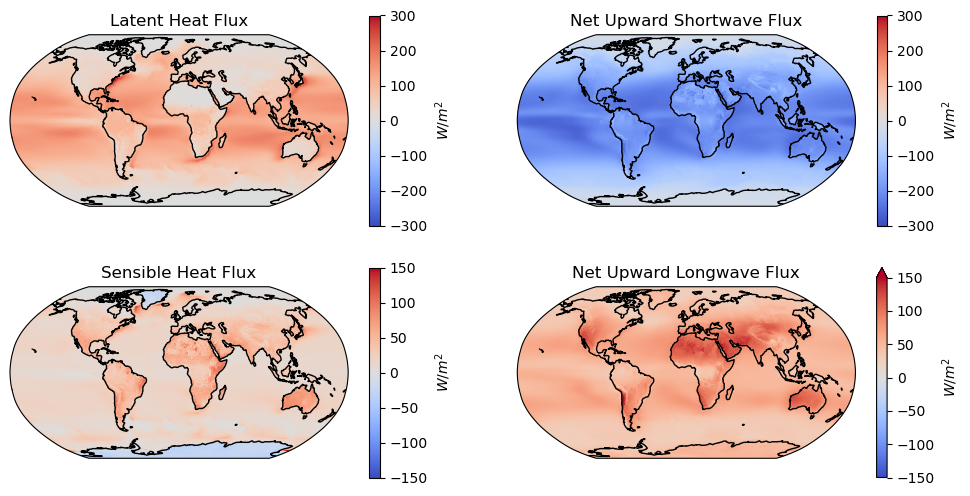

In [9]:
%matplotlib inline

fig, ([ax_latent, ax_shortwave], [ax_sensible, ax_longwave]) = plt.subplots(
    ncols=2, nrows=2, figsize=[12, 6], subplot_kw={"projection": ccrs.Robinson()}
)

# plot surface latent heat flux the first month of the historical period
hist_am_latent_heat_flux.plot(
    ax=ax_latent,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    vmin=-300,
    vmax=300,
    cmap="coolwarm",
    robust=True,
    cbar_kwargs={"label": "$W/m^2$"},
)
ax_latent.coastlines()
ax_latent.set_title("Latent Heat Flux")

# Repeat for sensible heat flux
hist_am_sensible_heat_flux.plot(
    ax=ax_sensible,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    vmin=-150,
    vmax=150,
    cmap="coolwarm",
    robust=True,
    cbar_kwargs={"label": "$W/m^2$"},
)
ax_sensible.coastlines()
ax_sensible.set_title("Sensible Heat Flux")

# Repeat for net shortwave radiative heat flux
hist_am_net_shortwave_heat_flux.plot(
    ax=ax_shortwave,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    vmin=-300,
    vmax=300,
    cmap="coolwarm",
    robust=True,
    cbar_kwargs={"label": "$W/m^2$"},
)
ax_shortwave.coastlines()
ax_shortwave.set_title("Net Upward Shortwave Flux")

# Repeat for net longwave radiative heat flux
hist_am_net_longwave_heat_flux.plot(
    ax=ax_longwave,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    vmin=-150,
    vmax=150,
    cmap="coolwarm",
    robust=True,
    cbar_kwargs={"label": "$W/m^2$"},
)
ax_longwave.coastlines()
ax_longwave.set_title("Net Upward Longwave Flux")